# Import library dan dataset

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
populasi = pd.read_csv('dataset_populasi_dunia.csv')
populasi.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


# Preparing Data

## Transform Data

In [61]:
populasi = (populasi.set_index('country')
         .stack()
         .reset_index(name='jumlah')
         .rename(columns={'level_1':'tahun'}))
populasi

,country,tahun,jumlah
0,Afghanistan,1800,3.28M
1,Afghanistan,1801,3.28M
2,Afghanistan,1802,3.28M
3,Afghanistan,1803,3.28M
4,Afghanistan,1804,3.28M
...,...,...,...
59292,Zimbabwe,2096,30.9M
59293,Zimbabwe,2097,31M
59294,Zimbabwe,2098,31M
59295,Zimbabwe,2099,31M


## Query

Mengambil data Indonesia

In [62]:
populasi = populasi[populasi['country'] == 'Indonesia']
populasi.tail()

,country,tahun,jumlah
23774,Indonesia,2096,324M
23775,Indonesia,2097,324M
23776,Indonesia,2098,323M
23777,Indonesia,2099,322M
23778,Indonesia,2100,321M


Reset index

In [63]:
populasi = populasi.reset_index(drop=True)
populasi

,country,tahun,jumlah
0,Indonesia,1800,16.1M
1,Indonesia,1801,16.2M
2,Indonesia,1802,16.2M
3,Indonesia,1803,16.2M
4,Indonesia,1804,16.3M
...,...,...,...
296,Indonesia,2096,324M
297,Indonesia,2097,324M
298,Indonesia,2098,323M
299,Indonesia,2099,322M


## Type Casting

In [64]:
populasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  301 non-null    object
 1   tahun    301 non-null    object
 2   jumlah   301 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


jumlah mau diubah jadi int

Untuk mengubah text satuan menjadi bilangan

In [65]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
populasi['jumlah'] = populasi['jumlah'].apply(value_to_float)
populasi.head()

,country,tahun,jumlah
0,Indonesia,1800,16100000.0
1,Indonesia,1801,16200000.0
2,Indonesia,1802,16200000.0
3,Indonesia,1803,16200000.0
4,Indonesia,1804,16300000.0


In [66]:
populasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  301 non-null    object 
 1   tahun    301 non-null    object 
 2   jumlah   301 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


## Check Missing Value

In [67]:
populasi.isnull().sum()

country    0
tahun      0
jumlah     0
dtype: int64

## Check Duplicate

In [68]:
populasi.count()

country    301
tahun      301
jumlah     301
dtype: int64

In [69]:
populasi.drop_duplicates()
populasi.count()

country    301
tahun      301
jumlah     301
dtype: int64

Tidak ada data duplikat

# EDA

C:\Users\haoki\AppData\Local\Temp\ipykernel_5724\2948909216.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


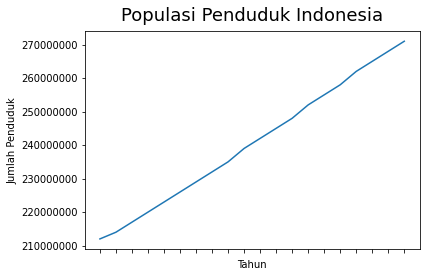

In [70]:
ax = sns.lineplot(
    x="tahun", 
    y = 'jumlah', data = 
    populasi.iloc[200:220,:]
)
plt.title("Populasi Penduduk Indonesia", y=1.02, fontsize=18)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ticklabel_format(style='plain', axis='y')

# Export

In [71]:
populasi.to_csv('cleaned_populasi.csv')